<a href="https://colab.research.google.com/github/mattany/IML/blob/main/problem_set_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [24]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(0)

2.b. It's interesting how similar the ouptut of the perceptron on the first and second training sets is.

Draw the axes:

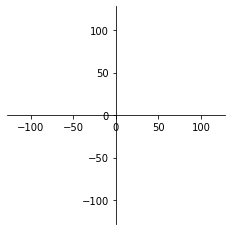

In [25]:
pos_dist_size = 2**7
def plot_axes():
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.xlim(-pos_dist_size, pos_dist_size)
    plt.ylim(-pos_dist_size, pos_dist_size)
    plt.gca().set_aspect('equal', adjustable='box')

    # Move left y-axis and bottim x-axis to centre, passing through (0,0)
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')

    # Eliminate upper and right axes
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
plot_axes()

Draw a random line:

In [26]:
def random_hyperplane(d):
    plane = pos_dist_size * 2 * np.random.random_sample(size=(d, d)) - pos_dist_size
    ones = np.empty(d)
    ones.fill(1)
    w = np.linalg.solve(plane, ones)
    w = np.append(-1, w) # Homogenize
    return w

# m, n = random_line()

    
w_star = random_hyperplane(2)

Generate the inputs:

In [27]:
def gen_inputs(n, d):
    inputs = pos_dist_size * 2 * np.random.random_sample(size=(n, d)) - pos_dist_size
    inputs = np.c_[np.ones(inputs.shape[0]), inputs] # Homogenize
    return inputs

inputs = gen_inputs(20, 2)

Evaluate the inputs and plot the outputs:

In [28]:
def evaluate_point(w, x):
    return 1 if np.dot(w, x) > 0 else -1

def evaluate_points(inputs, w):
    return [evaluate_point(w, input) for input in inputs]
 

def get_plot_coords(w):

    Xs = [-pos_dist_size, pos_dist_size, 0]
    Ys = [
        (-w[0] - w[1] * Xs[0]) / w[2],
        (-w[0] - w[1] * Xs[1]) / w[2],
        (-w[0] - w[1] * Xs[2]) / w[2]
    ]
    return Xs, Ys

outputs = evaluate_points(inputs, w_star)




def plot_outputs(w, w_star, inputs, outputs):
    plot_axes()
    red_Xs = [ inputs[i][1] for i in range(len(inputs)) if outputs[i] == 1]
    red_Ys = [ inputs[i][2] for i in range(len(inputs)) if outputs[i] == 1]
    blue_Xs = [ inputs[i][1] for i in range(len(inputs)) if outputs[i] == -1 ]
    blue_Ys = [ inputs[i][2] for i in range(len(inputs)) if outputs[i] == -1 ]
    plt.scatter(red_Xs, red_Ys, color="magenta")
    plt.scatter(blue_Xs, blue_Ys, color="turquoise")
    plt.plot(*get_plot_coords(w),  label="f - target function", color="red")
    plt.plot(*get_plot_coords(w_star), label="g - final hypothesis", color="green")
    plt.legend()

a. Converged in 3483 updates
c. f and g are visibly different


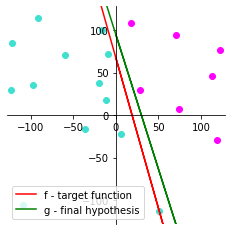

In [29]:
def get_misclassified(w, inputs, outputs):
    for i, inp in enumerate(inputs):
        if outputs[i] != evaluate_point(w, inp):
            return i
    return -1


def perceptron(inputs, outputs):
    shape = np.shape(inputs[0])
    w = np.zeros(shape)
    misclassified = get_misclassified(w, inputs, outputs)
    steps = 0
    done = False
    while not done:
        done = True
        for i, inp in enumerate(inputs):
            if outputs[i] != evaluate_point(w, inp):
                done = False
                w += outputs[i] * inp   
                steps +=1
    print(f"a. Converged in {steps} updates")
    return w

w = perceptron(inputs, outputs)
plot_outputs(w, w_star, inputs, outputs)
print(f"c. f and g are visibly different")

2.a.a-c can be seen above. Now we generate test data and calculate the error.

Generate some test data:

In [30]:
test_inputs = gen_inputs(100, 2)


2.a.d.

In [31]:

def calculate_error(test_inputs, w, w_star):
    n = len(test_inputs)
    test_outputs = evaluate_points(test_inputs, w_star)
    actual_outputs = evaluate_points(test_inputs, w)
    return sum([abs(test_outputs[i] - actual_outputs[i]) for i in range(n)]) / 200

print(f"d. f and g disagree on {calculate_error(test_inputs, w, w_star)} of the points")

d. f and g disagree on 0.09 of the points


2.b. It's interesting how similar the ouptut of the perceptron on the first and second training sets is.

In [32]:
b_inputs = gen_inputs(20, 2)
b_outputs = evaluate_points(b_inputs, w_star)

a. Converged in 2638 updates
c. f and g are visibly different
d. f and g disagree on 0.11 of the points


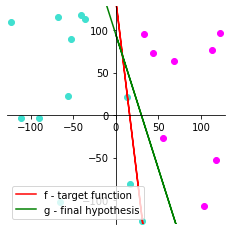

In [33]:

b_w = perceptron(b_inputs, b_outputs)
plot_outputs(b_w, w_star, b_inputs, b_outputs)
print(f"c. f and g are visibly different")
print(f"d. f and g disagree on {calculate_error(test_inputs, b_w, w_star)} of the points")

2.c. The time to converge grew a lot, and the result is more accurate.

In [34]:
c_inputs = gen_inputs(100, 2)
c_outputs = evaluate_points(c_inputs, w_star)

a. Converged in 4067 updates
c. f and g are much closer than before.
d. f and g disagree on 0.02 of the points


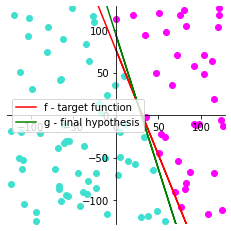

In [35]:

c_w = perceptron(c_inputs, c_outputs)
plot_outputs(c_w, w_star, c_inputs, c_outputs)
print(f"c. f and g are much closer than before.")
print(f"d. f and g disagree on {calculate_error(test_inputs, c_w, w_star)} of the points")

2.d. The time to converge grew marginally more, and now the lines are nearly indistinguishable.



In [36]:
d_inputs = gen_inputs(100, 2)
d_outputs = evaluate_points(d_inputs, w_star)

a. Converged in 3319 updates
c. f and g are almost the same.
d. f and g disagree on 0.01 of the points


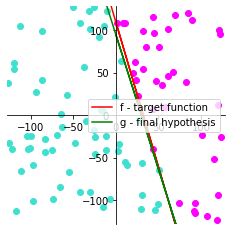

In [37]:
d_w = perceptron(d_inputs, d_outputs)
plot_outputs(d_w, w_star, d_inputs, d_outputs)
print(f"c. f and g are almost the same.")
print(f"d. f and g disagree on {calculate_error(test_inputs, d_w, w_star)} of the points")

2.e. Randomized perceptron

{720, 570, 90}
set()


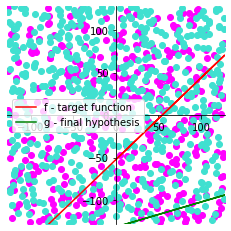

{960, 90, 365, 15, 371, 26}
set()


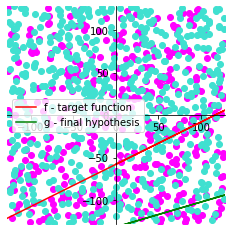

{928, 64}
set()


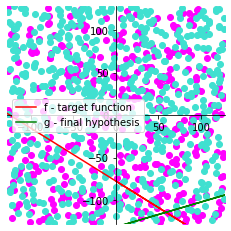

{932, 711, 713, 366, 19, 852, 438, 342, 858, 94}
set()


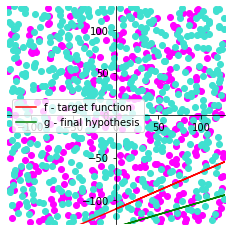

{288, 257, 66, 98, 708, 637, 796, 199, 404, 982, 156, 540}
set()


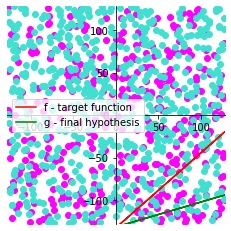

{707, 964, 645}
set()


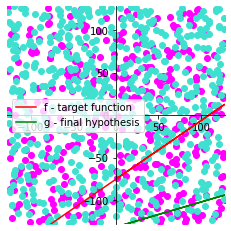

{291, 251, 745}
set()


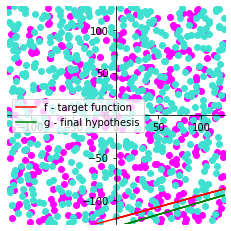

{384, 5, 6, 7, 651, 653, 13, 781, 401, 787, 788, 790, 280, 28, 157, 541, 927, 163, 36, 295, 808, 554, 174, 431, 560, 305, 48, 943, 564, 309, 559, 692, 312, 57, 442, 701, 447, 965, 197, 71, 72, 329, 203, 335, 851, 724, 469, 470, 982, 728, 601, 474, 220, 606, 889, 248, 742, 871, 103, 488, 106, 619, 365, 241, 242, 629, 888, 505, 765}
set()


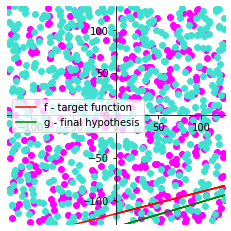

{291, 615, 72, 775, 269, 798, 18, 499, 371, 213, 146, 569, 411, 446}
set()


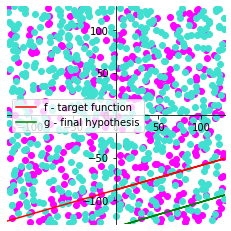

{386, 387, 262, 774, 392, 265, 12, 141, 14, 143, 405, 27, 29, 926, 799, 669, 160, 290, 39, 296, 683, 811, 557, 175, 48, 433, 49, 314, 58, 187, 573, 832, 449, 450, 323, 708, 200, 585, 329, 844, 589, 78, 591, 983, 856, 92, 93, 991, 992, 481, 99, 230, 999, 235, 620, 236, 494, 625, 626, 755, 634}
set()


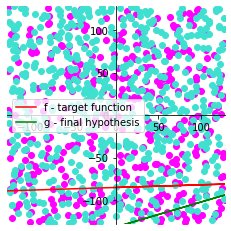

{235, 518, 511}
set()


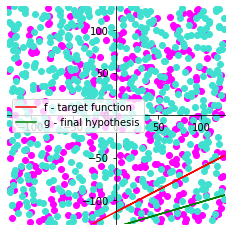

{641, 281, 411, 934, 679, 809, 949, 53, 567, 570, 571, 828, 61, 581, 326, 78, 336, 216, 475, 228, 617, 112, 499, 117}
set()


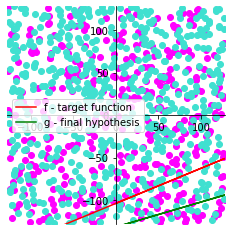

{256, 897, 644, 901, 902, 656, 278, 922, 798, 287, 674, 804, 550, 299, 942, 49, 309, 824, 954, 329, 586, 717, 974, 470, 854, 217, 607, 225, 98, 99, 738, 742, 494, 111, 759, 633, 510, 255}
set()


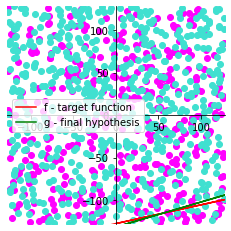

{255, 772, 891, 646, 270, 271, 912, 147, 21, 25, 32, 930, 297, 54, 55, 312, 694, 64, 843, 209, 466, 981, 599, 216, 727, 217, 92, 352, 612, 997, 740, 871, 111, 252, 887, 251, 764, 767}
set()


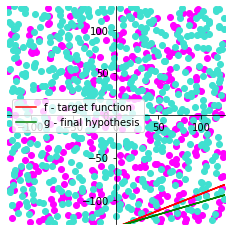

{5, 134, 647, 520, 905, 264, 139, 398, 783, 788, 153, 930, 291, 35, 805, 678, 173, 438, 183, 569, 698, 314, 64, 198, 199, 456, 970, 332, 205, 207, 339, 980, 84, 214, 90, 93, 223, 224, 353, 98, 995, 503, 613, 102, 105, 490, 619, 620, 494, 242, 755, 246, 887, 378, 123}
set()


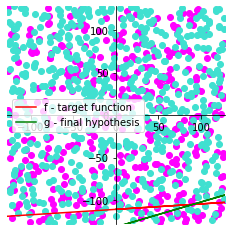

{962, 3, 899, 739, 195, 455, 392, 842, 687, 177, 114, 659, 22, 759, 570, 350}
set()


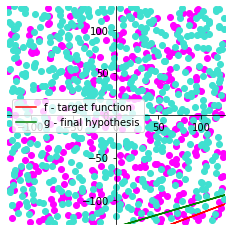

{907, 527, 529, 927, 33, 940, 178, 182, 967, 840, 712, 972, 844, 206, 593, 721, 731, 737, 498, 629}
set()


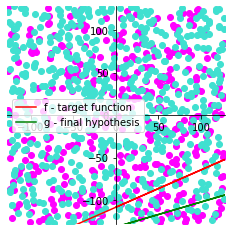

{385, 386, 133, 134, 5, 523, 268, 799, 166, 940, 685, 174, 943, 176, 436, 566, 320, 963, 845, 718, 719, 83, 468, 981, 473, 740, 231, 361, 492, 751, 369, 113, 625, 634, 379, 252}
set()


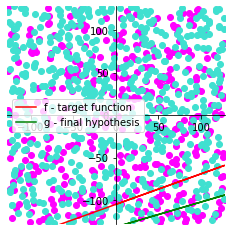

{770, 515, 2, 262, 647, 136, 10, 654, 785, 659, 405, 407, 537, 282, 540, 32, 673, 548, 805, 678, 938, 939, 47, 433, 819, 694, 438, 825, 826, 315, 700, 322, 328, 969, 330, 75, 459, 715, 202, 977, 850, 87, 983, 219, 606, 740, 998, 359, 488, 231, 492, 366, 627, 244, 118, 889, 890, 509, 127}
set()


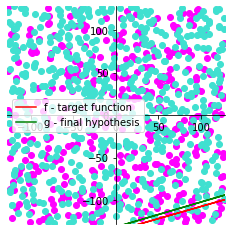

{512, 256, 130, 644, 132, 392, 11, 910, 146, 277, 791, 664, 792, 151, 408, 28, 27, 414, 291, 421, 679, 553, 811, 53, 568, 443, 700, 61, 446, 959, 319, 449, 322, 200, 203, 589, 461, 848, 337, 594, 465, 468, 89, 220, 94, 353, 359, 494, 757, 636, 253, 126}
set()


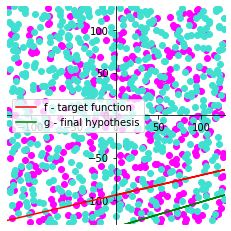

{259, 519, 269, 781, 527, 786, 790, 407, 920, 667, 28, 157, 414, 292, 932, 167, 297, 938, 426, 556, 557, 308, 186, 443, 956, 831, 705, 835, 722, 981, 476, 988, 862, 994, 616, 749, 110, 237, 244, 509, 511}
set()


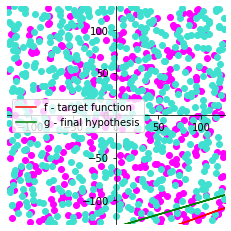

{776, 10, 139, 911, 274, 404, 20, 278, 920, 284, 161, 806, 171, 301, 941, 178, 182, 700, 319, 963, 836, 71, 72, 202, 843, 592, 977, 81, 87, 474, 353, 995, 376, 739, 227, 745, 106, 879, 624, 367, 499, 500, 371, 760}
set()


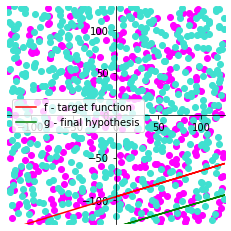

{1, 132, 901, 774, 392, 138, 906, 782, 144, 27, 155, 923, 796, 804, 934, 552, 940, 429, 48, 690, 823, 696, 56, 312, 573, 704, 320, 325, 584, 843, 723, 477, 607, 482, 101, 999, 487, 744, 365, 110, 366, 243, 372, 249, 634, 638, 895}
set()


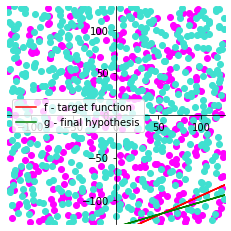

{256, 385, 262, 6, 267, 395, 269, 142, 908, 274, 662, 284, 415, 544, 801, 674, 548, 166, 551, 169, 172, 812, 558, 685, 944, 433, 50, 307, 435, 180, 309, 312, 828, 61, 956, 832, 66, 963, 194, 453, 966, 197, 328, 201, 708, 331, 75, 206, 78, 976, 81, 337, 596, 85, 597, 471, 343, 472, 474, 346, 731, 605, 357, 230, 744, 872, 236, 369, 684, 756, 246, 631, 249, 379, 766}
set()


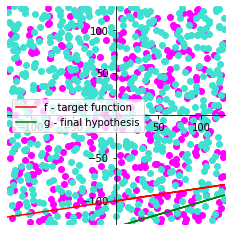

{2, 4, 516, 6, 521, 523, 524, 15, 527, 529, 17, 532, 23, 536, 537, 539, 30, 32, 544, 546, 549, 37, 39, 550, 552, 43, 44, 562, 568, 57, 56, 572, 61, 62, 580, 70, 582, 74, 586, 588, 75, 589, 591, 592, 81, 83, 595, 599, 603, 91, 605, 618, 106, 620, 108, 622, 111, 112, 621, 636, 637, 638, 125, 132, 133, 134, 647, 136, 648, 651, 140, 139, 149, 668, 672, 160, 676, 677, 175, 176, 177, 178, 692, 696, 697, 698, 184, 700, 189, 190, 192, 706, 714, 205, 719, 720, 721, 209, 211, 216, 729, 732, 221, 734, 735, 736, 225, 738, 227, 228, 232, 750, 239, 241, 246, 248, 249, 764, 252, 767, 769, 770, 771, 260, 776, 266, 267, 268, 781, 269, 780, 784, 791, 794, 285, 286, 292, 809, 816, 306, 822, 311, 824, 315, 828, 320, 836, 329, 842, 330, 333, 849, 339, 855, 343, 346, 860, 349, 354, 866, 356, 360, 362, 366, 881, 882, 883, 370, 885, 886, 380, 381, 894, 386, 898, 903, 392, 393, 905, 907, 909, 925, 928, 929, 418, 419, 934, 422, 936, 425, 426, 428, 942, 433, 948, 440, 956, 448, 450, 964, 965, 966, 969, 971, 974,

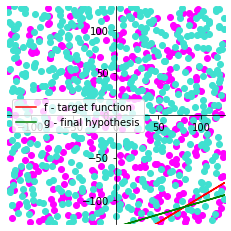

{864, 418, 195, 707, 869, 38, 429, 60, 975, 112, 722, 663, 985, 572}
set()


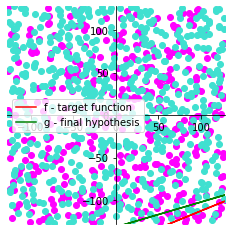

{8, 10, 524, 529, 21, 537, 26, 540, 542, 36, 556, 46, 568, 63, 69, 74, 75, 77, 80, 87, 91, 605, 100, 622, 628, 632, 124, 642, 643, 660, 661, 149, 152, 155, 668, 164, 684, 172, 687, 689, 180, 705, 708, 199, 209, 722, 730, 732, 223, 739, 748, 241, 248, 761, 250, 766, 259, 262, 266, 270, 785, 787, 789, 793, 282, 283, 803, 292, 299, 817, 310, 314, 315, 855, 351, 867, 356, 363, 364, 368, 369, 883, 886, 382, 383, 895, 386, 907, 397, 911, 917, 409, 410, 416, 420, 934, 936, 426, 428, 944, 437, 440, 441, 954, 959, 448, 969, 457, 461, 978, 988, 477, 991, 993, 994, 494, 496, 500, 504, 508}
set()


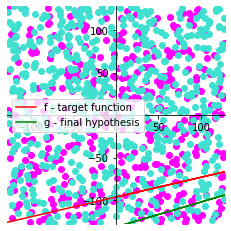

{98, 414, 932, 869, 72, 681, 77, 283, 496, 499, 23, 822, 567, 25, 251, 413, 126, 31}
set()


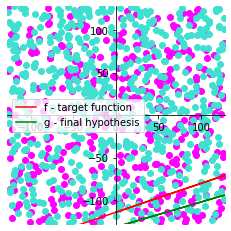

{875, 206, 944, 213, 25}
set()


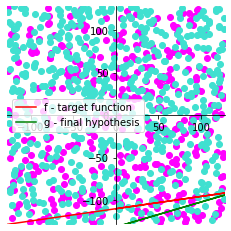

{257, 834, 485, 71, 810, 203, 973, 334, 528, 48, 371, 435, 730, 732, 349, 703}
set()


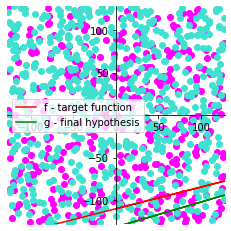

{641, 263, 647, 904, 138, 396, 397, 527, 17, 660, 20, 662, 151, 26, 923, 926, 677, 38, 680, 554, 816, 563, 54, 311, 572, 969, 970, 716, 80, 976, 467, 724, 470, 856, 729, 474, 216, 478, 606, 996, 741, 103, 109, 877, 623, 370, 116, 126}
set()


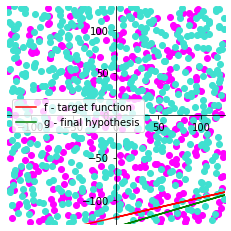

{0, 524, 14, 527, 529, 23, 538, 28, 547, 36, 550, 564, 569, 59, 582, 597, 95, 608, 609, 101, 108, 639, 130, 139, 653, 656, 661, 150, 666, 156, 165, 689, 180, 186, 193, 194, 709, 711, 200, 203, 212, 214, 728, 729, 730, 732, 224, 226, 236, 237, 752, 754, 755, 756, 253, 254, 260, 269, 789, 280, 803, 304, 852, 344, 859, 348, 860, 354, 867, 872, 366, 883, 379, 893, 382, 387, 901, 391, 905, 408, 423, 431, 434, 948, 438, 953, 959, 456, 975, 988, 994, 497, 500, 506}
set()


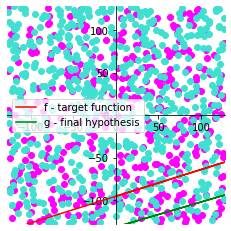

{512, 514, 2, 517, 6, 9, 10, 12, 14, 526, 18, 532, 21, 539, 541, 550, 42, 554, 556, 46, 51, 563, 57, 570, 60, 61, 573, 68, 71, 584, 74, 76, 589, 79, 594, 84, 87, 606, 95, 608, 614, 105, 618, 625, 630, 633, 124, 637, 650, 651, 654, 660, 149, 663, 154, 165, 169, 684, 173, 686, 685, 176, 178, 692, 182, 183, 185, 698, 187, 190, 704, 193, 194, 208, 722, 211, 730, 733, 228, 744, 233, 748, 749, 750, 751, 752, 757, 246, 248, 764, 264, 269, 272, 789, 278, 280, 282, 794, 796, 284, 283, 797, 803, 806, 297, 298, 301, 302, 817, 305, 307, 820, 309, 822, 311, 826, 827, 834, 835, 326, 839, 329, 331, 845, 334, 335, 341, 855, 350, 354, 355, 356, 357, 870, 360, 363, 878, 366, 880, 881, 370, 367, 887, 889, 898, 388, 900, 903, 904, 393, 397, 910, 912, 915, 408, 409, 920, 413, 415, 929, 418, 931, 425, 937, 427, 428, 431, 432, 947, 445, 452, 968, 457, 461, 975, 982, 482, 489, 496, 501, 506, 508}
set()


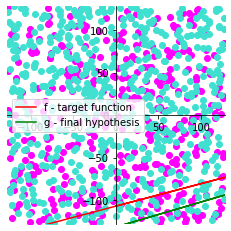

{3, 524, 526, 528, 17, 530, 20, 537, 540, 33, 548, 37, 45, 558, 561, 64, 579, 582, 588, 593, 88, 90, 603, 93, 609, 102, 108, 109, 110, 111, 624, 639, 656, 145, 663, 667, 163, 164, 682, 186, 700, 189, 712, 202, 210, 724, 726, 216, 732, 220, 222, 231, 233, 746, 747, 243, 244, 759, 761, 250, 767, 768, 770, 258, 781, 783, 785, 787, 280, 796, 799, 295, 297, 301, 814, 305, 307, 825, 826, 829, 322, 323, 327, 330, 845, 334, 337, 850, 339, 859, 349, 358, 370, 898, 903, 394, 907, 398, 911, 401, 918, 923, 924, 927, 931, 420, 937, 940, 433, 951, 965, 458, 974, 977, 477, 989, 479, 991, 485, 490, 508}
set()


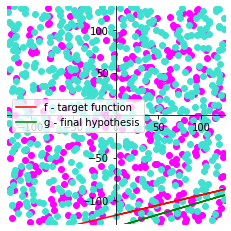

{514, 132, 383, 776, 905, 267, 655, 400, 21, 661, 282, 28, 797, 540, 927, 159, 30, 166, 679, 808, 294, 297, 39, 684, 303, 819, 57, 441, 444, 60, 446, 320, 962, 579, 196, 836, 966, 199, 968, 967, 330, 711, 76, 844, 583, 82, 211, 724, 341, 216, 90, 730, 476, 93, 324, 96, 197, 739, 741, 997, 236, 237, 495, 884, 888, 502, 374, 120, 509, 382, 127}
set()


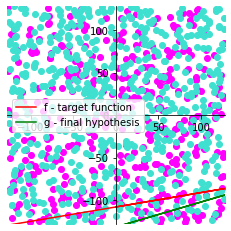

{129, 681, 234, 48, 884, 959}
set()


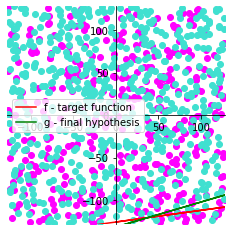

{514, 677, 487, 40, 328, 361, 31}


KeyboardInterrupt: ignored

In [43]:
def perceptron_random(inputs, outputs):
    n = len(inputs)
    shape = np.shape(inputs[0])
    w = np.zeros(shape)
    unseen = {i for i in range(n)}
    seen = set()
    misclassified = get_misclassified(w, inputs, outputs)
    steps = 0
    done = False

    while len(unseen):
        index = np.random.randint(len(unseen))
        i = list(unseen)[index]
        unseen.remove(i)
        seen.add(i)
        if outputs[i] != evaluate_point(w, inputs[i]):
            unseen = {i for i in range(n)}
            if steps%10000 == 0:
                print(seen)
            seen = set()
            w += outputs[i] * inputs[i]
            steps +=1
            if steps%10000 == 0:
                print(seen)
                plot_outputs(w, e_w_star, inputs, outputs)
                plt.show()
    print(f"a. Converged in {steps} updates")
    return w
e_w_star = random_hyperplane(10)
e_inputs = gen_inputs(1000, 10)

e_outputs = evaluate_points(e_inputs, e_w_star)
perceptron_random(e_inputs, e_outputs)